### 问题：
  有两个天线，海拔、纬度相同，它们连线中心的座标是东经120度。它们之间的距离是100米。采集系统的观测频率范围是 50-200 MHz， 频率信道宽度是(200/8192) MHz，在50-200 MHz之间一共有6144个频率信道。也就是说每一个信道的中心频率值是(50+i*(200/8192))MHz。天空中在R.A.=0 deg, Dec=80 deg处有一个唯一的射电源，射电源的谱的斜率是0（也就是平谱），画出这两个天线在24小时内相关得到的visibility的实部、虚部的时频瀑布图。

# 射电干涉测量中Visibility函数的完整理论推导

## 1. 基本概念与定义

### 1.1 干涉测量基本原理
- ​**​Visibility函数​**​：表示两个天线接收信号的互相关
  $$ V(u,v,w) = I \cdot e^{-2\pi i (ul + vm + wn)} $$
  - $I$: 源强度（平谱时设为1）
  - $(u,v,w)$: 基线投影（波长单位）
  - $(l,m,n)$: 源方向余弦

### 1.2 坐标系系统
| 坐标系 | 定义 | 关键参数 |
|--------|------|----------|
| 地球坐标系 | 原点在地心 | $(X,Y,Z)$ |
| 天空坐标系 | 原点在观测站 | $(u,v,w)$ |

## 2. 关键参数推导

### 2.1 基线矢量
$$\mathbf{B} = \mathbf{r}_2 - \mathbf{r}_1 = 
\begin{bmatrix}
B_x \\
B_y \\
B_z
\end{bmatrix}$$

对于东西向基线（赤道）：
$$ B_x = 100m,\ B_y = B_z = 0 $$

### 2.2 方向余弦
对于R.A.=0°, Dec=80°：
$$
\begin{cases}
l = \cos80° \approx 0.1736 \\
m = 0 \\
n = \sin80° \approx 0.9848
\end{cases}
$$

## 3. 坐标转换与投影

### 3.1 旋转矩阵
地球→天空坐标转换：
$$
\mathbf{T} = 
\begin{bmatrix}
-\sin H & \cos H & 0 \\
-\sin\phi\cos H & -\sin\phi\sin H & \cos\phi \\
\cos\phi\cos H & \cos\phi\sin H & \sin\phi
\end{bmatrix}
$$

### 3.2 基线投影
$$
\begin{bmatrix}
u \\
v \\
w
\end{bmatrix}
= \frac{1}{\lambda}\mathbf{T}
\begin{bmatrix}
B_x \\
B_y \\
B_z
\end{bmatrix}
$$

展开式：
$$
\begin{cases}
u = \frac{-B_x\sin H + B_y\cos H}{\lambda} \\
v = \frac{-B_x\sin\phi\cos H - B_y\sin\phi\sin H + B_z\cos\phi}{\lambda} \\
w = \frac{B_x\cos\phi\cos H + B_y\cos\phi\sin H + B_z\sin\phi}{\lambda}
\end{cases}
$$

## 4. Visibility函数计算

### 4.1 相位项
$$\phi = 2\pi(ul + wn) = \frac{2\pi B}{\lambda}(l\sin H + n\cos\phi\cos H)$$

### 4.2 实部/虚部分解
$$
\begin{cases}
Re(V) = \cos\phi \\
Im(V) = -\sin\phi
\end{cases}
$$

## 5. 时频特性分析

### 5.1 频率依赖
$$\phi \propto \frac{1}{\lambda} = \frac{\nu}{c}$$
- 高频→密集条纹
- 低频→稀疏条纹

### 5.2 时间演化
时角变化：
$$ H(t) = \frac{2\pi}{24}t \quad (t\ in\ hours) $$

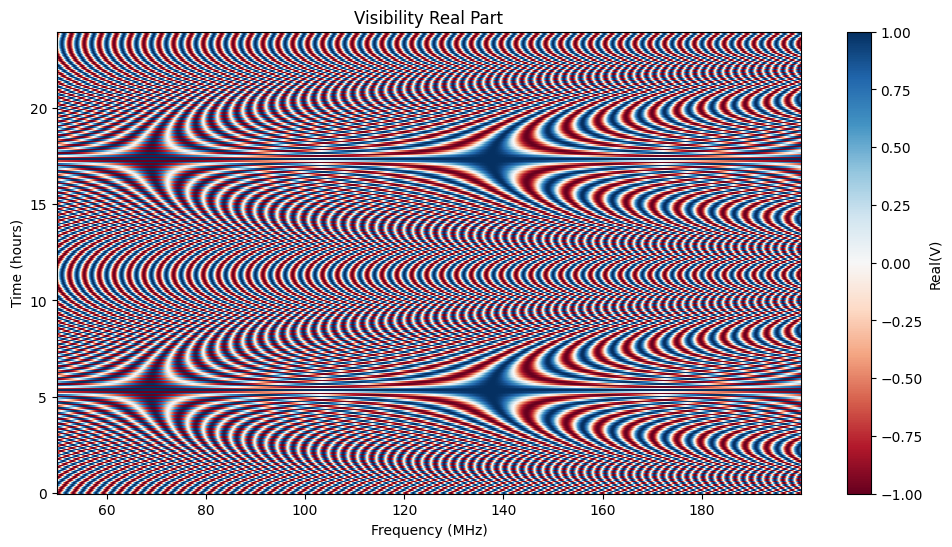

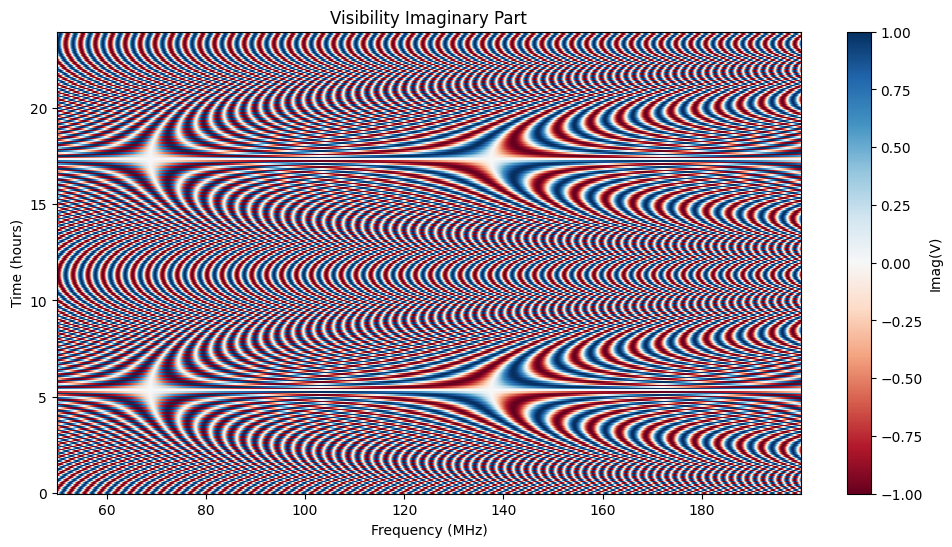

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
B = 100  # Baseline length (m)
dec_deg = 80  # Declination (degrees)
dec = np.deg2rad(dec_deg)

# Direction cosines (l, m, n)
l = np.cos(dec)  # l = cos(Dec) * cos(R.A.), R.A.=0
n = np.sin(dec)  # n = sin(Dec)

# Frequency setup (50-200 MHz, 6144 channels)
num_channels = 6144
frequencies = 50e6 + (200e6 / 8192) * np.arange(num_channels)  # Hz
wavelengths = c / frequencies  # Wavelengths (m)

# Time setup (24 hours, 5-minute resolution)
times_hours = np.arange(0, 24, 5/60)  # Time points (hours)
HA_rad = np.deg2rad(15 * times_hours)  # Hour angle (radians)

# Initialize visibility matrices
V_real = np.zeros((len(times_hours), num_channels))
V_imag = np.zeros((len(times_hours), num_channels))

for i, H in enumerate(HA_rad):
    # Baseline projections (u, w) in wavelengths
    u = B * np.sin(H) / wavelengths  # East-West component
    w = B * np.cos(H) / wavelengths  # Vertical component
    
    # Phase: 2π (u*l + w*n)
    phi = 2 * np.pi * (u * l + w * n)
    
    # Visibility
    V_real[i, :] = np.cos(phi)
    V_imag[i, :] = -np.sin(phi)  # Negative sign for convention

# Plotting
plt.figure(figsize=(12, 6))
plt.pcolormesh(frequencies/1e6, times_hours, V_real, 
               shading='auto', cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='Real(V)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time (hours)')
plt.title('Visibility Real Part')

plt.figure(figsize=(12, 6))
plt.pcolormesh(frequencies/1e6, times_hours, V_imag, 
               shading='auto', cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='Imag(V)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time (hours)')
plt.title('Visibility Imaginary Part')

plt.show()